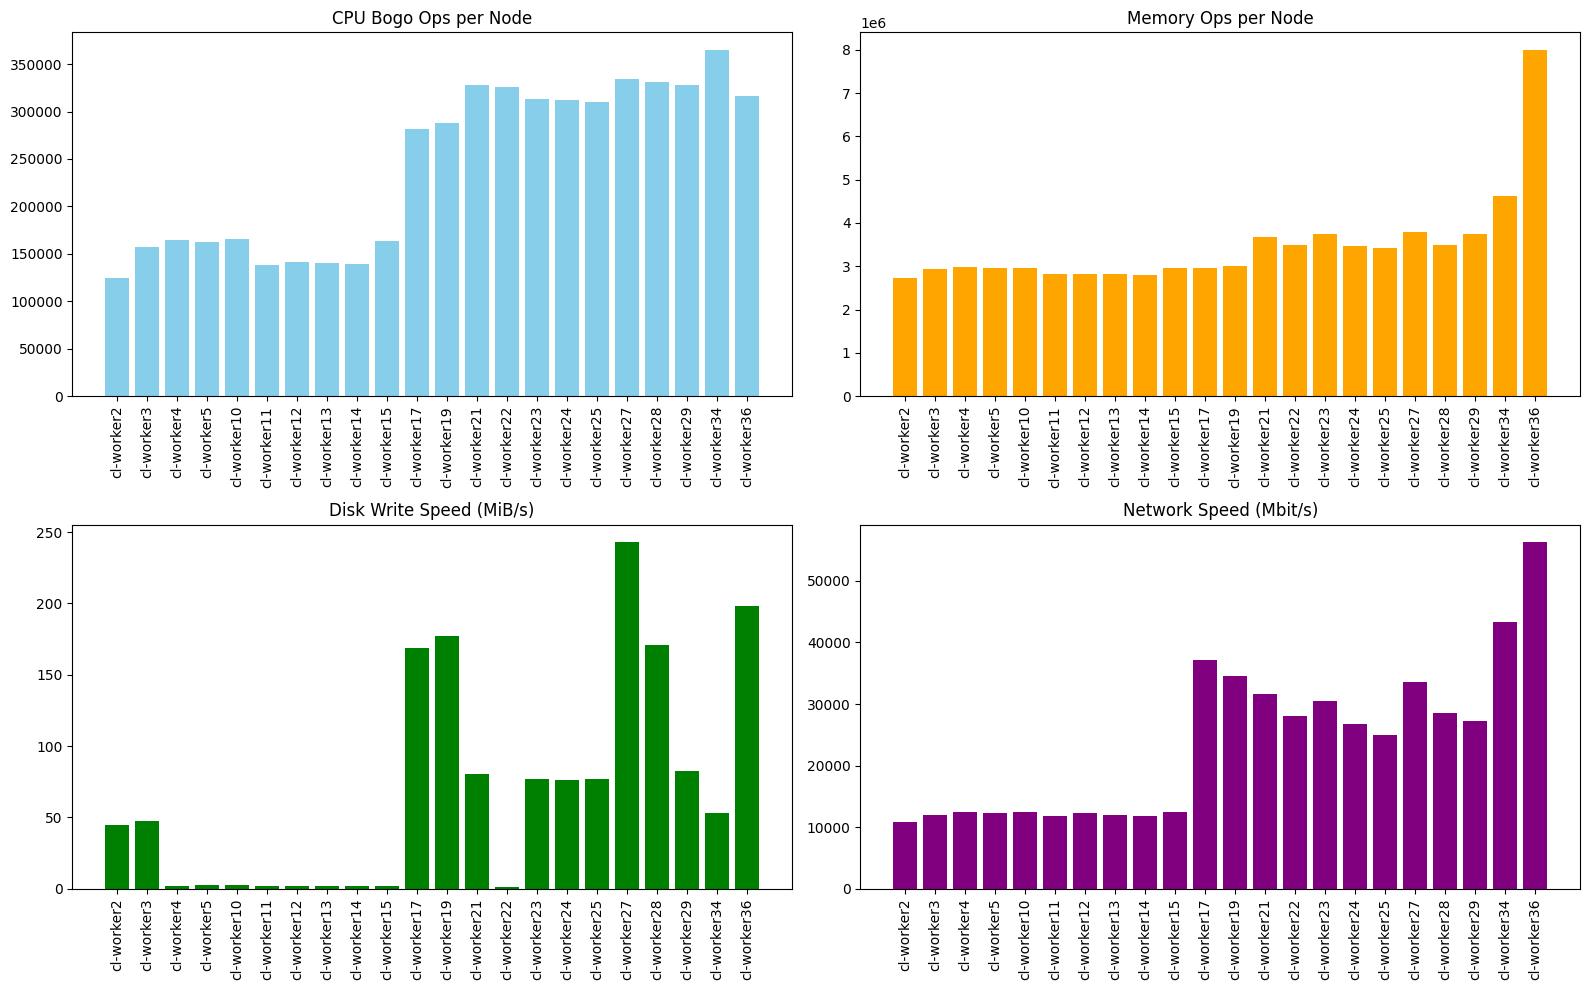

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Paste your CSV data as a string
data = """
Node,CPU Bogo Ops,Memory Ops,Disk Write Speed (MiB/s),Network Speed (Mbit/s)
cl-worker10,165909,2958183,2837KiB/s(2905kB/s),12500.0
cl-worker11,138575,2822722,1755KiB/s(1797kB/s),11800.0
cl-worker12,140901,2829927,1719KiB/s(1760kB/s),12300.0
cl-worker13,139926,2813147,1811KiB/s(1854kB/s),11900.0
cl-worker14,139292,2790391,1736KiB/s(1778kB/s),11800.0
cl-worker15,164004,2962480,1933KiB/s(1979kB/s),12400.0
cl-worker17,281830,2953242,169MiB/s(178MB/s),37200.0
cl-worker19,287573,2996768,177MiB/s(186MB/s),34600.0
cl-worker2,124623,2721751,44.3MiB/s(46.4MB/s),10900.0
cl-worker21,327980,3679580,80.1MiB/s(84.0MB/s),31600.0
cl-worker22,326131,3483481,1471KiB/s(1507kB/s),28100.0
cl-worker23,313128,3740553,77.0MiB/s(80.7MB/s),30500.0
cl-worker24,311702,3456641,76.1MiB/s(79.8MB/s),26800.0
cl-worker25,309534,3412910,76.7MiB/s(80.4MB/s),24900.0
cl-worker27,334631,3795207,243MiB/s(255MB/s),33500.0
cl-worker28,331376,3482050,171MiB/s(179MB/s),28500.0
cl-worker29,327643,3747558,82.3MiB/s(86.3MB/s),27300.0
cl-worker3,156963,2934203,47.7MiB/s(50.0MB/s),11900.0
cl-worker34,365186,4615279,53.1MiB/s(55.7MB/s),43300.0
cl-worker36,315841,8002949,198MiB/s(207MB/s),56300.0
cl-worker4,164925,2975747,2214KiB/s(2267kB/s),12400.0
cl-worker5,162794,2955288,2726KiB/s(2792kB/s),12300.0
"""

# Load into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Convert Disk Write Speed to MiB/s numerically
def parse_disk_speed(s):
    match = re.match(r"([\d.]+)(KiB|MiB)", s)
    if not match:
        return None
    value, unit = match.groups()
    value = float(value)
    if unit == "KiB":
        return value / 1024  # Convert KiB to MiB
    return value

df["Disk MiB/s"] = df["Disk Write Speed (MiB/s)"].apply(parse_disk_speed)

# Plot all metrics
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
#df_sorted = df.sort_values("CPU Bogo Ops")
# Extract worker number from node name for natural sorting
df["NodeNum"] = df["Node"].apply(lambda x: int(re.search(r'\d+', x).group()))
df_sorted = df.sort_values("NodeNum")

# CPU
axs[0, 0].bar(df_sorted["Node"], df_sorted["CPU Bogo Ops"], color="skyblue")
axs[0, 0].set_title("CPU Bogo Ops per Node")
axs[0, 0].tick_params(axis='x', rotation=90)

# Memory
axs[0, 1].bar(df_sorted["Node"], df_sorted["Memory Ops"], color="orange")
axs[0, 1].set_title("Memory Ops per Node")
axs[0, 1].tick_params(axis='x', rotation=90)

# Disk
axs[1, 0].bar(df_sorted["Node"], df_sorted["Disk MiB/s"], color="green")
axs[1, 0].set_title("Disk Write Speed (MiB/s)")
axs[1, 0].tick_params(axis='x', rotation=90)

# Network
axs[1, 1].bar(df_sorted["Node"], df_sorted["Network Speed (Mbit/s)"], color="purple")
axs[1, 1].set_title("Network Speed (Mbit/s)")
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
